In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Activation
from keras.optimizers import Adam

In [13]:
mnist = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
(xtrain,xtest) = (xtrain/255.0, xtest/255.0)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [15]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = 'logs/fit', histogram_freq = 1)

In [17]:
history = model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 10,callbacks = tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6393 - accuracy: 0.8383 - val_loss: 0.3485 - val_accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3458 - accuracy: 0.9028 - val_loss: 0.2859 - val_accuracy: 0.9191
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2938 - accuracy: 0.9168 - val_loss: 0.2489 - val_accuracy: 0.9325
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2582 - accuracy: 0.9274 - val_loss: 0.2227 - val_accuracy: 0.9371
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2324 - accuracy: 0.9353 - val_loss: 0.2061 - val_accuracy: 0.9412
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2141 - accuracy: 0.9407 - val_loss: 0.1870 - val_accuracy: 0.9485
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1968 - accuracy: 0.9445 - val_loss: 0.1751 - val_ac

In [18]:
load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10000), started 0:48:10 ago. (Use '!kill 10000' to kill it.)

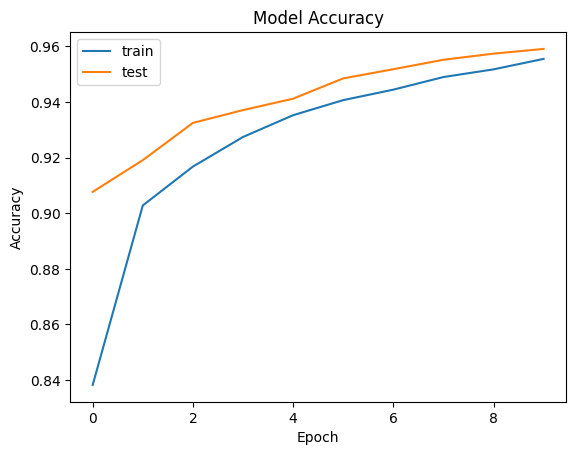

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

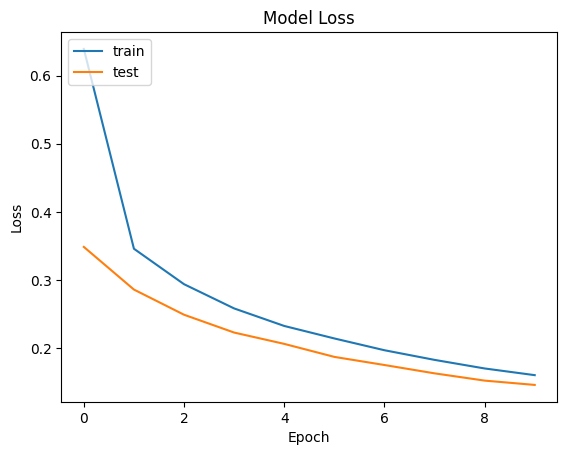

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()